<a href="https://colab.research.google.com/github/azmiak/Kuliah-Deep-Learning/blob/main/Week%203%20/%20Tugas%20/%20Tensorflow_CIFAR-10_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import numpy as np

In [ ]:
# Load dataset
(ds_train, ds_test), ds_info = tfds.load('cifar10', split=['train', 'test'], as_supervised=True, with_info=True)

# Preprocessing
IMG_SIZE = 32
BATCH_SIZE = 64

def preprocess(image, label):
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.reshape(image, (IMG_SIZE * IMG_SIZE * 3,))  # Flatten the image properly
    return image, label

ds_train = ds_train.map(preprocess).batch(BATCH_SIZE).shuffle(10000).prefetch(tf.data.experimental.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
# Define MLP model
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(1024, activation='relu', input_shape=(IMG_SIZE * IMG_SIZE * 3,)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

model = build_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train model
EPOCHS = 50
history = model.fit(ds_train, validation_data=ds_test, epochs=EPOCHS)

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.1766 - loss: 2.2626 - val_accuracy: 0.2649 - val_loss: 2.0024
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2232 - loss: 2.0311 - val_accuracy: 0.2886 - val_loss: 1.9795
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2387 - loss: 1.9968 - val_accuracy: 0.2689 - val_loss: 1.9789
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2472 - loss: 1.9857 - val_accuracy: 0.2832 - val_loss: 1.9526
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2475 - loss: 1.9728 - val_accuracy: 0.2941 - val_loss: 1.9382
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2579 - loss: 1.9582 - val_accuracy: 0.2837 - val_loss: 1.9566
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.2654 - loss: 1.9572 - val_accuracy: 0.2734 - val_loss: 1.9580
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2686 - loss: 1.9463 - val_accuracy: 

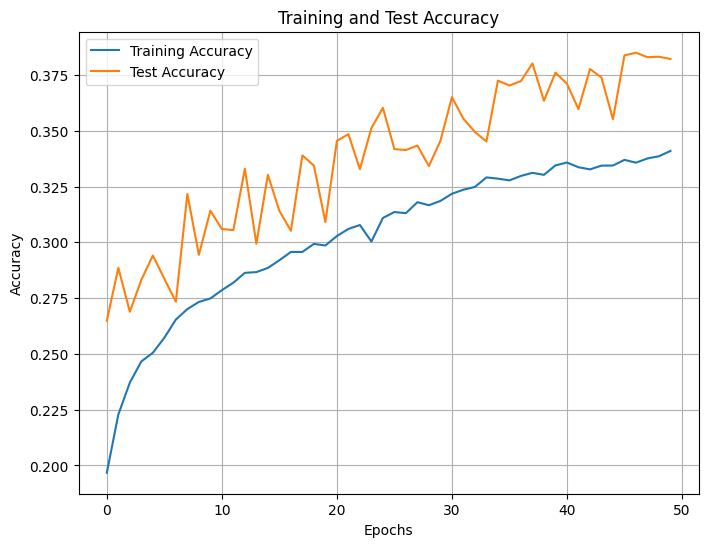

In [ ]:
# Plot accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Evaluate model
y_true, y_pred, y_probs = [], [], []
for images, labels in ds_test:
    probs = model.predict(images)
    preds = np.argmax(probs, axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(preds)
    y_probs.extend(probs)

y_probs = np.array(y_probs)
auc = roc_auc_score(y_true, y_probs, multi_class='ovr')
report = classification_report(y_true, y_pred, output_dict=True)

print(f"Final Accuracy: {report['accuracy']:.4f}")
print(f"Precision: {report['macro avg']['precision']:.4f}")
print(f"Recall: {report['macro avg']['recall']:.4f}")
print(f"F1 Squared: {report['macro avg']['f1-score'] ** 2:.4f}")
print(f"AUC: {auc:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━

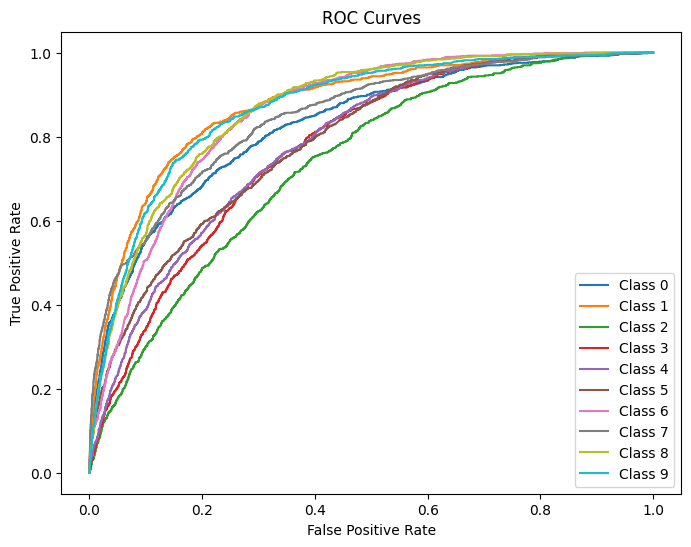

In [ ]:
# ROC Curve
plt.figure(figsize=(8, 6))
for i in range(10):
    fpr, tpr, _ = roc_curve(np.array(y_true) == i, y_probs[:, i])
    plt.plot(fpr, tpr, label=f'Class {i}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

# Evaluasi Model CNN - CIFAR-10 Dataset

## Persamaan Matematika Evaluasi Model

Metrik evaluasi yang digunakan untuk menilai performa model CNN pada dataset CIFAR-10.

---

### 1. **Accuracy**

Mengukur seberapa banyak prediksi yang benar.


$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$


Keterangan:
- **TP** = True Positive
- **TN** = True Negative
- **FP** = False Positive
- **FN** = False Negative

---

### 2. **Precision**

Mengukur seberapa tepat prediksi positif model.

$\text{Precision} = \frac{TP}{TP + FP}$

---

### 3. **Recall**

Mengukur seberapa banyak data positif yang berhasil diprediksi model.

$\text{Recall} = \frac{TP}{TP + FN}$

---

### 4. **F1-Score**

Rata-rata harmonis dari Precision dan Recall untuk menyeimbangkan keduanya.

$\text{F1-Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$

---

### 5. **AUC (Area Under Curve)**

Mengukur kemampuan model untuk membedakan antara kelas positif dan negatif. Nilai AUC berada di antara 0 dan 1. Semakin tinggi nilainya, semakin baik model dalam membedakan antar kelas.

$$
\text{AUC} = \int_{0}^{1} \text{TPR}(\text{FPR}) \, d\text{FPR}
$$

---

### 6. **ROC Curve (Receiver Operating Characteristic Curve)**

Kurva ROC menggambarkan hubungan antara True Positive Rate (TPR) dan False Positive Rate (FPR):

\[
$\text{TPR} = \frac{TP}{TP + FN}$
\]

\[
$\text{FPR} = \frac{FP}{FP + TN}$
\]